In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

I have always been interested in sci-fi movies and voels - there's just something about the vast and expanding universe that intrigues and scares me. I have always held out hope that humanity can find existence of extra-terrestrial beings during my lifetime, and I wanted to explore this passion for this project.

Let's say that I'm pitching this project to the executive team at a NASA-like organization that is instead in conducting large-scale research on ETs and UFOs. It first wants to determine how much public interest and support there is for a project like this, and it will use this information to determine how much funding to ask for for this project. This is where I come in - I am a data scientist who has been given access to a dataset containing UFO sightings across the world. They want me to use this data to give them insights on the state of UFO sightings in the US.

(I found a dataset on Kaggle titled "UFO Sightings" which contains information on various UFO sightings across the world over the last century). 

In [2]:
df = pd.read_csv('scrubbed.csv')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


As we can see, there are various features available to us: the location of the sighting, the date and duration of the sighting, what the sighting was, etc.

Let's see what countries our data covers:

In [4]:
df['country'].unique()

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

So we have data from the United States, Great Britain, Canada, Australia, and Denmark (along with a few missing values). Let's examine the missing values in the data and see if we can do some slight cleaning.

In [5]:
df.isnull().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

So there is a lot of missing data in our dataset. Since the focus of this notebook is to answer questions and tell a story, I am just going to remove the rows with missing values.

In [6]:
df.dropna(inplace=True)

Now let's get on with answering our questions (under the assumption that the data we contain now creates a complete picture of UFO sightings across the world over the last century). 

The first thing I want to do is only extract the rows pertaining to UFO sightings in the US.

In [7]:
df_us = df[df['country'] == 'us']

In [8]:
states = df_us['state'].unique()
sorted(states)

['ak',
 'al',
 'ar',
 'az',
 'ca',
 'co',
 'ct',
 'dc',
 'de',
 'fl',
 'ga',
 'hi',
 'ia',
 'id',
 'il',
 'in',
 'ks',
 'ky',
 'la',
 'ma',
 'md',
 'me',
 'mi',
 'mn',
 'mo',
 'ms',
 'mt',
 'nc',
 'nd',
 'ne',
 'nh',
 'nj',
 'nm',
 'nv',
 'ny',
 'oh',
 'ok',
 'or',
 'pa',
 'pr',
 'ri',
 'sc',
 'sd',
 'tn',
 'tx',
 'ut',
 'va',
 'vt',
 'wa',
 'wi',
 'wv',
 'wy']

There is a clear discrepancy - there is no state called 'PR.' I will remove it from my dataset.

In [9]:
df_us = df_us[df_us['state'] != 'pr']

In [10]:
print("The earliest sighting in our dataset is from {} and the latest sighting in our data is from {}.".format(min(df['datetime']), max(df['datetime'])))

The earliest sighting in our dataset is from 1/1/1910 24:00 and the latest sighting in our data is from 9/9/2013 23:00.


First, I want to understand how the reports are scattered across the country. Are there any states that have had more sightings than others?

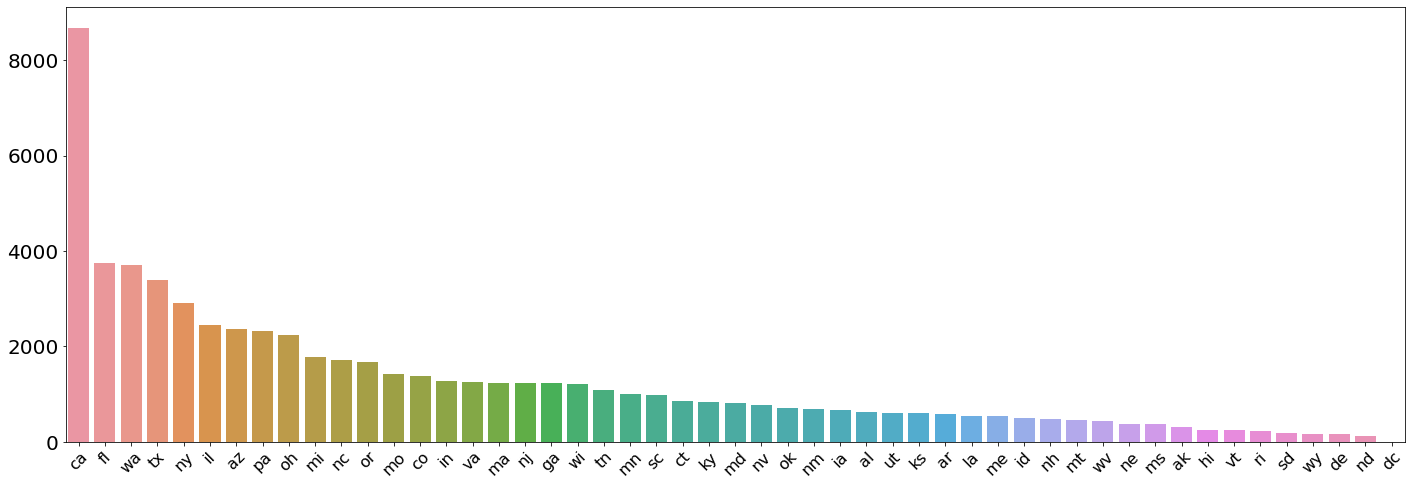

In [11]:
states = df_us["state"].value_counts().index
states_ratio = df_us["state"].value_counts().values

plt.subplots(figsize=(24,8))
sns.barplot(x=states, y=states_ratio)
plt.xticks(rotation=45, fontsize=16);
plt.yticks(fontsize=20);

Interesting, most of the sightings are from California! I guess this makes sense considering that California is the most populated and one of the largest states in the country. So if the team is considering a campaign to raise funds/awareness, it should start with the states with the most sightings so as to get through to the most people.

Now let's try to understand what shapes/things were most commonly seen. This will also help provide a lot of insight when designing ad campaigns.

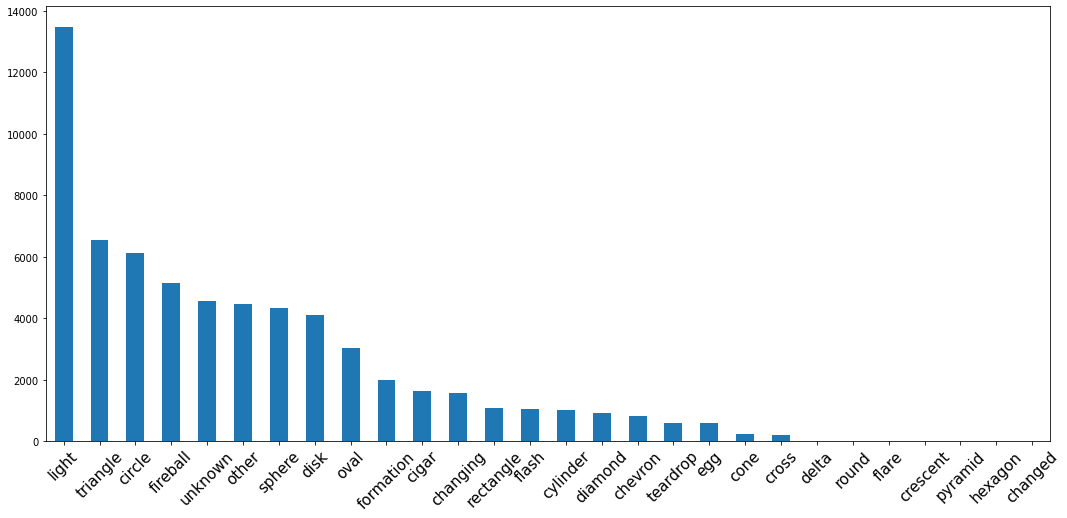

In [12]:
plt.subplots(figsize=(18,8))

df_us['shape'].value_counts().plot(kind='bar')
plt.xticks(rotation=45, fontsize=15);

Interesting - the most commonly viewed 'UFO' is just light, and the rest of the common ones are pretty vague as well (a circle, a triangle, a fireball, etc). This means that the vaguer the shape/image is, the more likely it is for someone to think it is a UFO. This is an important insight to keep in mind when designing promotional campaigns.

The next question I want to answer is how have the number of sightings changed over time. Maybe they were really popular in the 1900s but not so much now?

In [14]:
# cleaning the datetime values before changing their type

df_us['datetime'] = df_us['datetime'].str.replace('24:00', '00:00')
df_us['datetime'] = pd.to_datetime(df_us['datetime'], format='%m/%d/%Y %H:%M')

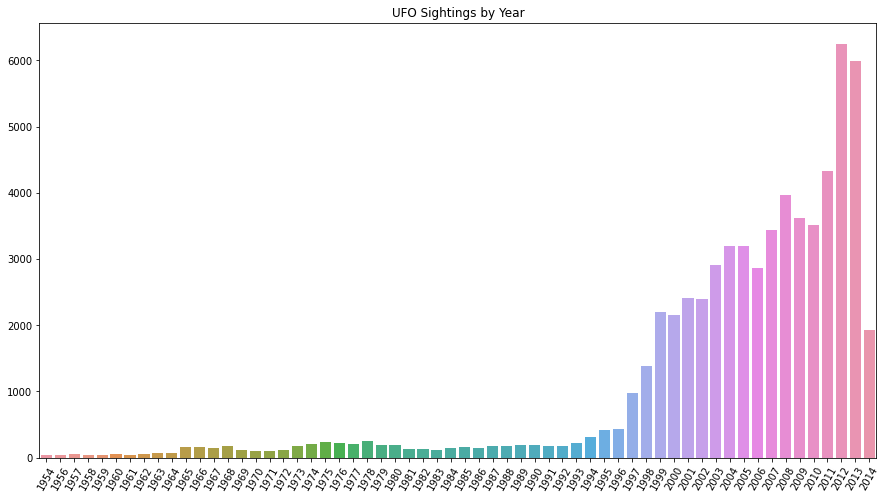

In [22]:
years_data = df_us['datetime'].dt.year.value_counts()
years_index = years_data.index  # x ticks
years_values = years_data.values

plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('UFO Sightings by Year')

years_plot = sns.barplot(x=years_index[:60],y=years_values[:60]) # so I can skip the first few nearly empty bars

The number of sightings have definitely gone up! Of course, we need to account for the possibility that it merely looks like the number of sightings have gone up when the probability of a sighting being reported in recent times is much higher than before.

I now want to understand if there is a specific time during the year when UFO sightings are much more likely.

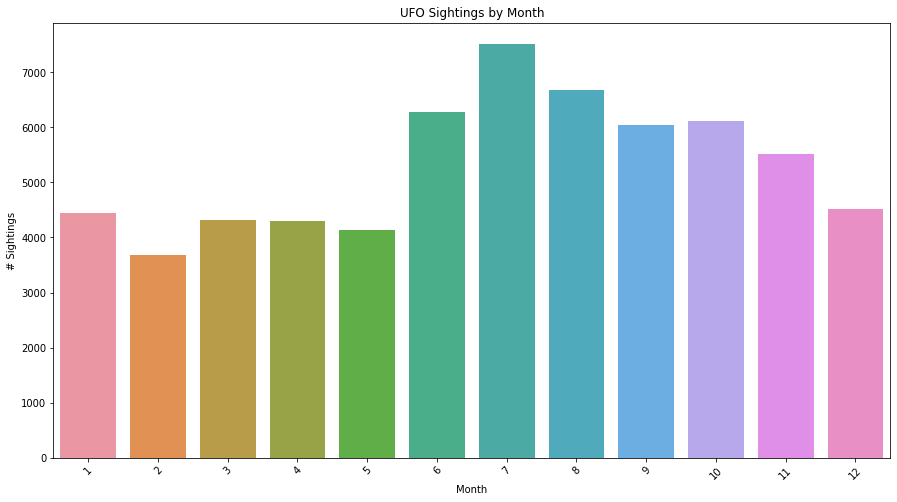

In [30]:
m_cts = (df_us['datetime'].dt.month.value_counts()).sort_index()
m_ctsx = m_cts.index
m_ctsy = m_cts.values

plt.figure(figsize=(15,8))

sns.barplot(x=m_ctsx, y=m_ctsy)
plt.title('UFO Sightings by Month')
plt.xlabel('Month')
plt.ylabel('# Sightings')
plt.xticks(rotation=45);

Very interesting - it looks as if UFO sightings are much more common in the summer. The company should increase their funding and campaigning efforts during the summer since people are much more likely to experience a UFO sighting then and will be more receptive to fund research during those months.

Overall, the data shows that UFO sightings are prominent across the US, and the chances of a successful campaign are high. Here are the following things I would suggest to the team to do further research on:

1. Use some natural language processing tools on the texts in the data to understand what people are saying about the sightings. Are they positive/negative? Are people excited at the prospect of seeing a UFO or scared? This will help them decide what tone they should adopt for their campaign.

2. As discovered, there are certain patterns much more commonly observed when people see UFOs, and this should definitely be employed when designing campaigns. For example, circles were commonly observed by people and so if making a presentation on UFOs, using circles in the presentation will appeal to everyone who observed it.